# Hackathon Repaying the Credit

Repaying the Credit

Gold Atlantis, a credit-providing firm, observed a rise in the number of defaulters.

Now, the firm is only interested in those consumers who have a lower probability of becoming

# OBJECTIVE OF THE CASE STUDY
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

# ~ IMPORTING RELEVANT LIBRARIES ~

In [2]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("DS1_C5_S4_Credit_Data_Hackathon.csv") # read_csv: inbuilt function of pandas to read files 

# Level 0 Analysis: Understanding Data

In [4]:
df.head(10)#reading top 10 rows for understanding.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,-1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,1395000.0,...,-3130,1,1,0,1,0,Accountants,3.0,SUNDAY,2
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,1530000.0,...,-449,1,1,1,1,0,Managers,2.0,MONDAY,1
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,913500.0,...,365243,1,0,0,1,0,NaN,2.0,WEDNESDAY,1
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,405000.0,...,-2019,1,1,0,1,0,Laborers,1.0,THURSDAY,0


In [5]:
df.tail(10)#reading bottom 10 rows for understanding.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99990,216081,0,Revolving loans,F,N,Y,1,67500.0,180000.0,180000.0,...,-927,1,1,1,1,0,High skill tech staff,3.0,MONDAY,0
99991,216082,0,Cash loans,M,Y,N,2,270000.0,450000.0,450000.0,...,-5525,1,1,0,1,0,Managers,4.0,MONDAY,1
99992,216083,0,Cash loans,F,N,N,0,81000.0,486459.0,342000.0,...,-574,1,1,0,1,0,High skill tech staff,2.0,WEDNESDAY,1
99993,216084,0,Revolving loans,F,N,N,0,90000.0,180000.0,180000.0,...,-491,1,1,1,1,0,Core staff,1.0,TUESDAY,0
99994,216085,0,Cash loans,M,Y,N,0,225000.0,612000.0,612000.0,...,-135,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [6]:
print(df.shape) #returns a tuple with the details number of rows and columns 


(100000, 24)


# Display the names of all the columns

In [7]:
for col in df:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
GENDER
Car
House
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
DAYS_EMPLOYED
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


# Data dictionary

In [8]:
'''index,Row,Description
1,SK_ID_CURR,ID of loan in our sample
2,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
3,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
4,GENDER,Gender of the client
5,Car,Flag if the client owns a car
6,House,Flag if client owns a house or flat
7,CNT_CHILDREN,Number of children the client has
8,AMT_INCOME_TOTAL,Income of the client
9,AMT_CREDIT,Credit amount of the loan
10,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given
11,NAME_TYPE_SUITE,Who was accompanying client when he was applying for the loan
12,NAME_INCOME_TYPE,"Clients income type (businessman, working, maternity leave,…)"
13,NAME_EDUCATION_TYPE,Level of highest education the client achieved
14,NAME_FAMILY_STATUS,Family status of the client
15,DAYS_EMPLOYED,How many days before the application the person started current employment
16,MOBILE,"Did client provide mobile phone (1=YES, 0=NO)"
17,WORK_PHONE,"Did client provide work phone (1=YES, 0=NO)"
18,HOME_PHONE,"Did client provide home phone (1=YES, 0=NO)"
19,MOBILE_REACHABLE,"Was mobile phone reachable (1=YES, 0=NO)"
20,FLAG_EMAIL,"Did client provide email (1=YES, 0=NO)"
21,OCCUPATION_TYPE,What kind of occupation does the client have
22,CNT_FAM_MEMBERS,How many family members does client have
23,APPLICATION_DAY,On which day of the week did the client apply for the loan
24,TOTAL_DOC_SUBMITTED,Number of documents submitted during loan''';


# Displaying the dataset information

In [9]:
df.info()       # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [10]:
#Basic Exploration and Exploratory Data Analysis

#Now, I will check the statistical summary of the given dataset by using describe function.

#Describe: It will give count, mean, std, 25%, 50%, 75%, max value of all numerical colums of the dataset.


df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,9.991900e+04,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000
mean,158006.140860,0.080930,0.417390,1.694261e+05,5.990034e+05,5.383451e+05,63292.222060,0.999990,0.82128,0.199740,0.997990,0.056190,2.155672,0.931210
std,33481.166996,0.272729,0.721014,3.835007e+05,4.020520e+05,3.693977e+05,140839.697296,0.003162,0.38312,0.399807,0.044788,0.230289,0.908897,0.343917
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.500000e+04,-17531.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129076.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-2758.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,157877.000000,0.000000,0.000000,1.440000e+05,5.130405e+05,4.500000e+05,-1219.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,186982.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-291.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216090.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,4.050000e+06,365243.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14.000000,4.000000


# Checking if there are null values in any columns

In [11]:
df.isnull().sum()       # isnull returns the True/False dataframe
                            #sum: counts the number of True in columns

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

# there ARE NULL VALUES IN 3 COLUMNS

# Analysis of OCCUPATION_TYPE column

In [12]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 17977
Sales staff              10383
Core staff                8952
Managers                  6969
Drivers                   6057
High skill tech staff     3650
Accountants               3258
Medicine staff            2851
Security staff            2201
Cooking staff             1954
Cleaning staff            1512
Private service staff      863
Low-skill Laborers         705
Waiters/barmen staff       437
Secretaries                415
Realty agents              242
HR staff                   181
IT staff                   169
Name: OCCUPATION_TYPE, dtype: int64

# Impute NULL values with Unknown category

In [13]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

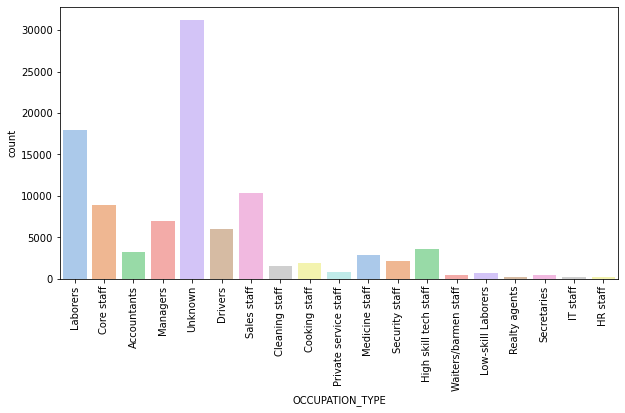

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE",palette='pastel')
plt.xticks(rotation = 90)
plt.show()

# Observations

Looking at the plot, Laborers has the highest number of loan applicants
For imputation, it would be better to leave the data as is (missing values being 31.35%) and not impute to min/min/mode/median as it may bias the data in later computations

In [15]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      80789
Family             13102
Spouse, partner     3704
Children            1072
Other_B              556
Other_A              287
Group of people       85
Name: NAME_TYPE_SUITE, dtype: int64

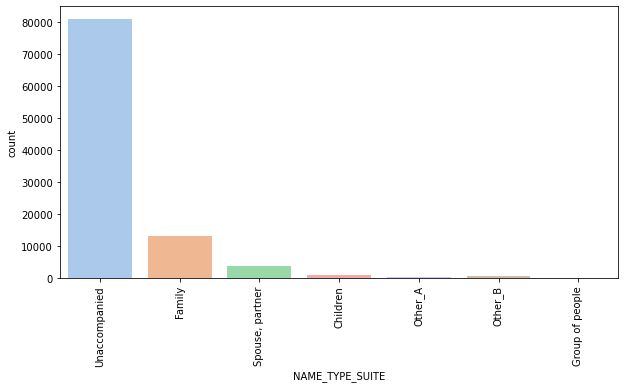

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE",palette='pastel')
plt.xticks(rotation = 90)
plt.show()

# Observations

Looking at the plot, Unaccompanied category has the highest number of loan applicants. So, most of the loan applicants venture out alone for applying loan
We can go ahead and impute Unaccompanied in the dataframe

In [17]:
df['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace = True)

# Analysis of AMT_GOODS_PRICE column

In [18]:
df.AMT_GOODS_PRICE.value_counts().head()

450000.0    8459
225000.0    8201
675000.0    8155
900000.0    5016
270000.0    3721
Name: AMT_GOODS_PRICE, dtype: int64

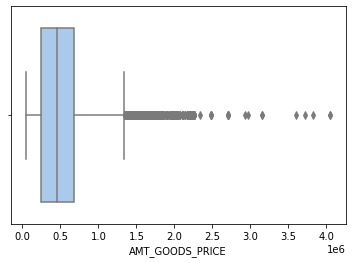

In [19]:
sns.boxplot(df.AMT_GOODS_PRICE,palette='pastel')
plt.show()

# Most recurring value in AMT_GOODS_PRICE

In [20]:
df.AMT_GOODS_PRICE.mode()[0]

450000.0

# Checking the average value of AMT_GOODS_PRICE

In [21]:
df.AMT_GOODS_PRICE.mean()

538345.1489706662

In [22]:
df['AMT_GOODS_PRICE'].fillna(value = 53845, inplace = True)

In [23]:
df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        1
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

# Dealing with incorrect/unknown data values

# Analysis of CODE_GENDER column

In [24]:
df['GENDER'].value_counts()

F      65855
M      34142
XNA        3
Name: GENDER, dtype: int64

# Gender should only be Male or Female. XNA value may indicate that the value was not provided by the loan applicant or missed by the loan officer verifying the application

In [25]:
df[df['GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,337500.0,...,-10044,1,1,1,1,0,Unknown,2.0,TUESDAY,0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,225000.0,...,-2797,1,1,1,1,0,Low-skill Laborers,4.0,FRIDAY,0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,225000.0,...,-1228,1,1,1,1,0,Core staff,3.0,THURSDAY,0


s data looks valid, we will go ahead and check for an imputation method.

Female applicants are twice the number of Male applicants
And so, we will go ahead and impute CODE_GENDER with '

In [26]:
df['GENDER'] = df['GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

In [27]:
df['GENDER'].value_counts()

F    65858
M    34142
Name: GENDER, dtype: int64

# LEVEL 1 Analysis

# Identify if the data type in each column is categorical or numerical?

Separate out the categorical columns from the numerical types

These are the kind of analyses that can be performed on categorical data Check if it is Nominal or Ordinal Check how many categories are present Check the Mode Check for Missing values Think about how the missing values could be treated Think about the kind of graph/chart that can be plotted using this data Note: We are analyzing only one column at a time (Univariate Analysis).

# Separating Categorical and Numerical Variables

In [28]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 35:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


# 𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 𝐶𝑎𝑡𝑒𝑔𝑜𝑟𝑖𝑐𝑎𝑙 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

# Analyzing TARGET column

In [29]:
df['TARGET'].value_counts()

0    91907
1     8093
Name: TARGET, dtype: int64

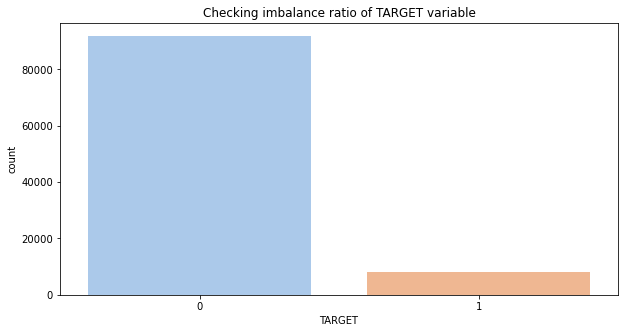

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df,palette='pastel')
plt.title('Checking imbalance ratio of TARGET variable')
plt.show()

We have imbalance in TARGET variable based on the % of observations
TARGET value 1 represents client with payment difficulties (he/she had late payment more than X days on at least one of the first Y installments of the loan). This is very less
TARGET value 0 represents all other cases than 1. 

In [31]:
df.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         90.517
Revolving loans     9.483
Name: NAME_CONTRACT_TYPE, dtype: float64

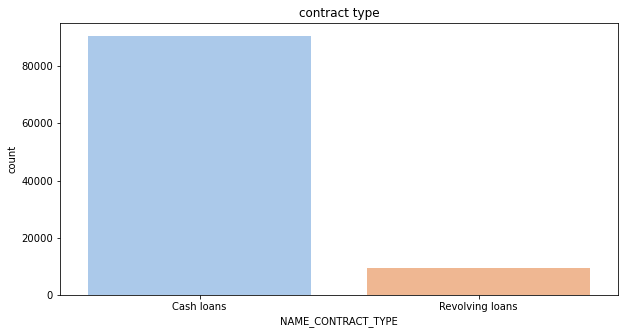

In [32]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['NAME_CONTRACT_TYPE'], data = df,palette='pastel')
plt.title('contract type')
plt.show()

# The Contract_type graph shows that CASH loans were taken by 90.51% of the people  and only 9.4% people took Revolving Loans

In [33]:
df.GENDER.value_counts(normalize=True)*100

F    65.858
M    34.142
Name: GENDER, dtype: float64

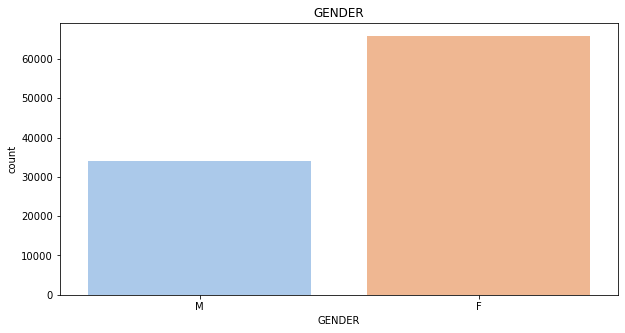

In [34]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['GENDER'], data = df , palette='pastel')
plt.title('GENDER')
plt.show()

# The GENDER_type graph shows that LOANS were taken by more number of females.

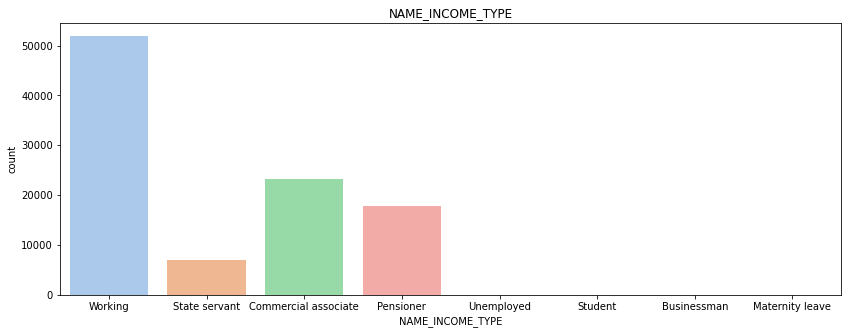

In [35]:
plt.figure(figsize = (14,5))
sns.countplot(x = df['NAME_INCOME_TYPE'], data = df ,palette='pastel' )
plt.title('NAME_INCOME_TYPE')
plt.show()

# Income_type graph shows clients income type. The majority of the clients who applied for loans were working class professionals with 1,58,000 applications. Followed by Commercial associate 71,000 applications, which is followed by pensioners and State servants.

# Unemployed, Students, Bussinessman, Maternity leave people were the least amount of people who applied for loan

In [36]:
df.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 64.058
Single / not married    14.571
Civil marriage           9.769
Separated                6.347
Widow                    5.254
Unknown                  0.001
Name: NAME_FAMILY_STATUS, dtype: float64

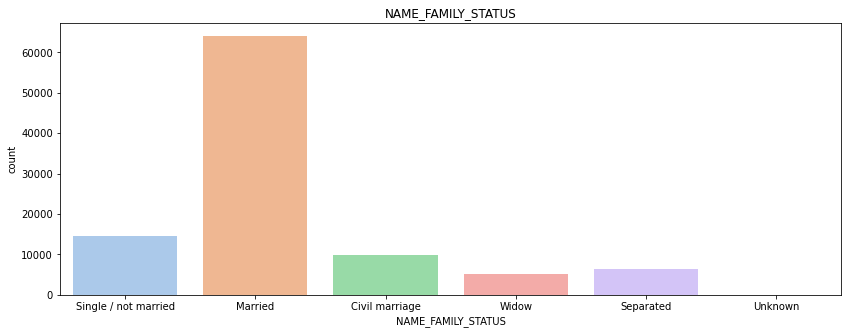

In [37]:
plt.figure(figsize = (14,5))
sns.countplot(x = df['NAME_FAMILY_STATUS'], data = df ,palette='pastel' )
plt.title('NAME_FAMILY_STATUS')
plt.show()

# Married people were the higher percentage of loan applicants with 64.08%. Followed by Single people having 14.57%
# Civil marriage, Seperate, Widow were among the lower percentage category who applied for loans

In [38]:
df.OCCUPATION_TYPE.value_counts(normalize=True)*100

Unknown                  31.224
Laborers                 17.977
Sales staff              10.383
Core staff                8.952
Managers                  6.969
Drivers                   6.057
High skill tech staff     3.650
Accountants               3.258
Medicine staff            2.851
Security staff            2.201
Cooking staff             1.954
Cleaning staff            1.512
Private service staff     0.863
Low-skill Laborers        0.705
Waiters/barmen staff      0.437
Secretaries               0.415
Realty agents             0.242
HR staff                  0.181
IT staff                  0.169
Name: OCCUPATION_TYPE, dtype: float64

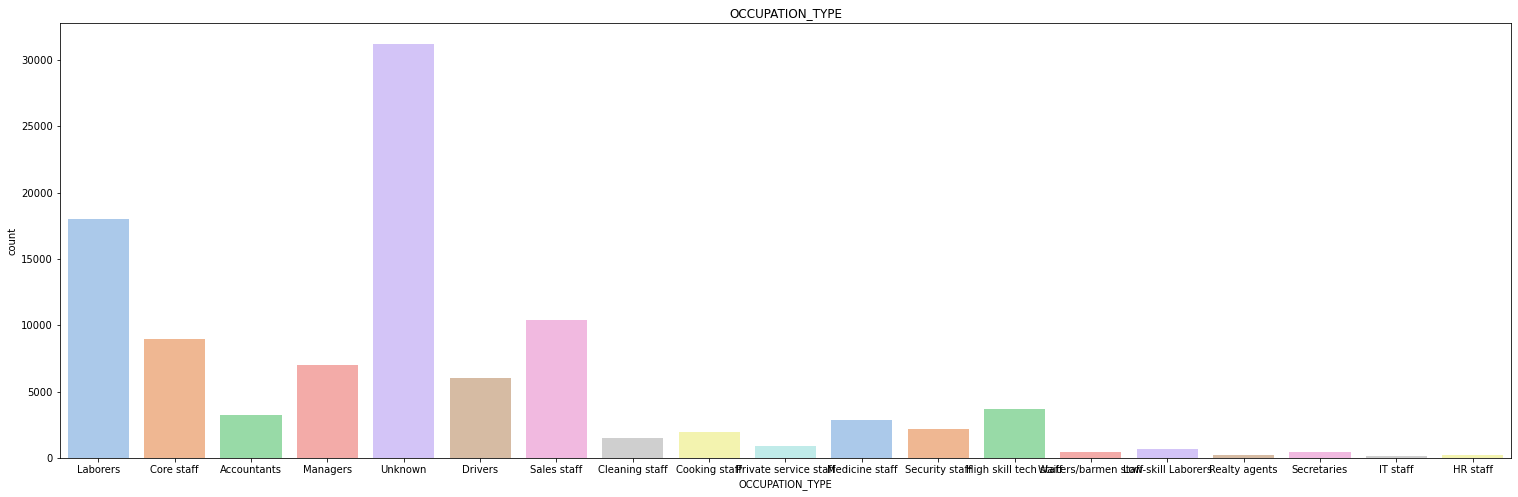

In [39]:
plt.figure(figsize = (26,8))
sns.countplot(x = df['OCCUPATION_TYPE'], data = df ,palette='pastel' )
plt.title('OCCUPATION_TYPE')
plt.show()

# As you can see from the above percentage value that Laborers were the highest percentage of people who applied for a loan having the value of 17.13%, Followed by Sales staff (10.30%), Core staff (8.95%), Managers (6.96%), Drivers (6.05%) etc

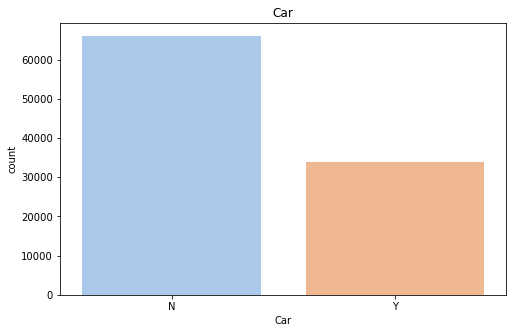

In [40]:
plt.figure(figsize = (8,5))
sns.countplot(x = df['Car'], data = df , palette='pastel')
plt.title('Car')
plt.show()

In [41]:
df.Car.value_counts(normalize=True)*100

N    66.018
Y    33.982
Name: Car, dtype: float64

# 65.98% of the people do own a car
# 34.01% of the people who applied own a car

In [42]:
df.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    71.068
Higher education                 24.399
Incomplete higher                 3.270
Lower secondary                   1.214
Academic degree                   0.049
Name: NAME_EDUCATION_TYPE, dtype: float64

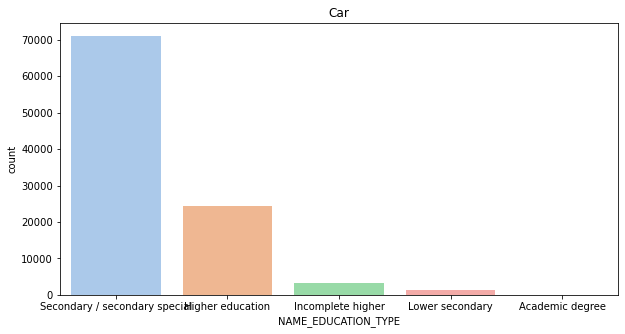

In [43]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['NAME_EDUCATION_TYPE'], data = df ,palette='pastel' )
plt.title('Car')
plt.show()

# Majority of the applicants had a Secondary education (71.06%) followed by Higher education (24.39%). Academic degree had the lowest percentage

# 𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 NUMERICAL 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

In [44]:
Numerical=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE','DAYS_EMPLOYED']

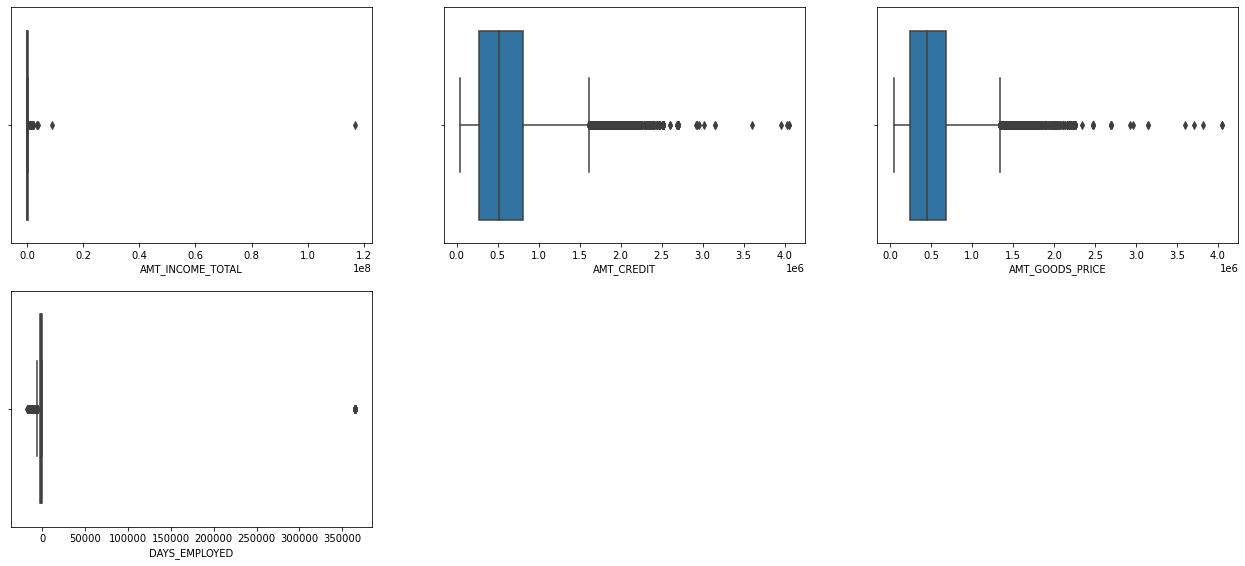

In [45]:
plt.figure(figsize=(22,20))

for i in enumerate(Numerical):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(df[i[1]])

plt.show()

From the above diagrams we can conclude that:

Amt_Income_Total has a very high outlier, but it does not mean it could be an error. Some people have very high income

Amt_Credit,  Amt_Goodprice, have outliers which are normal considering some people have  high credit value



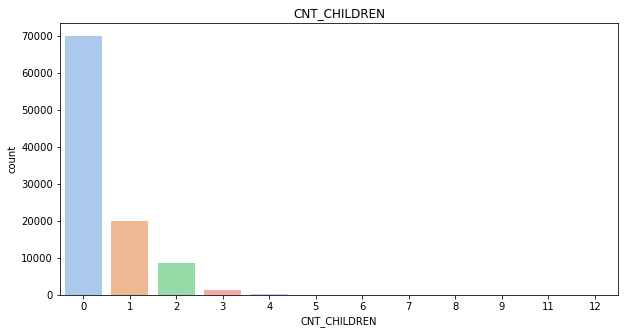

In [46]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['CNT_CHILDREN'], data = df ,palette='pastel' )
plt.title('CNT_CHILDREN')
plt.show()

# applicants who had childrens count with 0 was the highest

# Bivariate Analysis & Multivariate Analysis

In [47]:
Category=["NAME_CONTRACT_TYPE","GENDER","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
          "NAME_FAMILY_STATUS","House","CNT_CHILDREN","CNT_FAM_MEMBERS","FLAG_EMAIL","MOBILE_REACHABLE","TOTAL_DOC_SUBMITTED","Car"]
#Not including Organization type as Its alot of categories, hence we will analyse it seperately 

# Comparing all the categorical columns with target variable for better analysis.

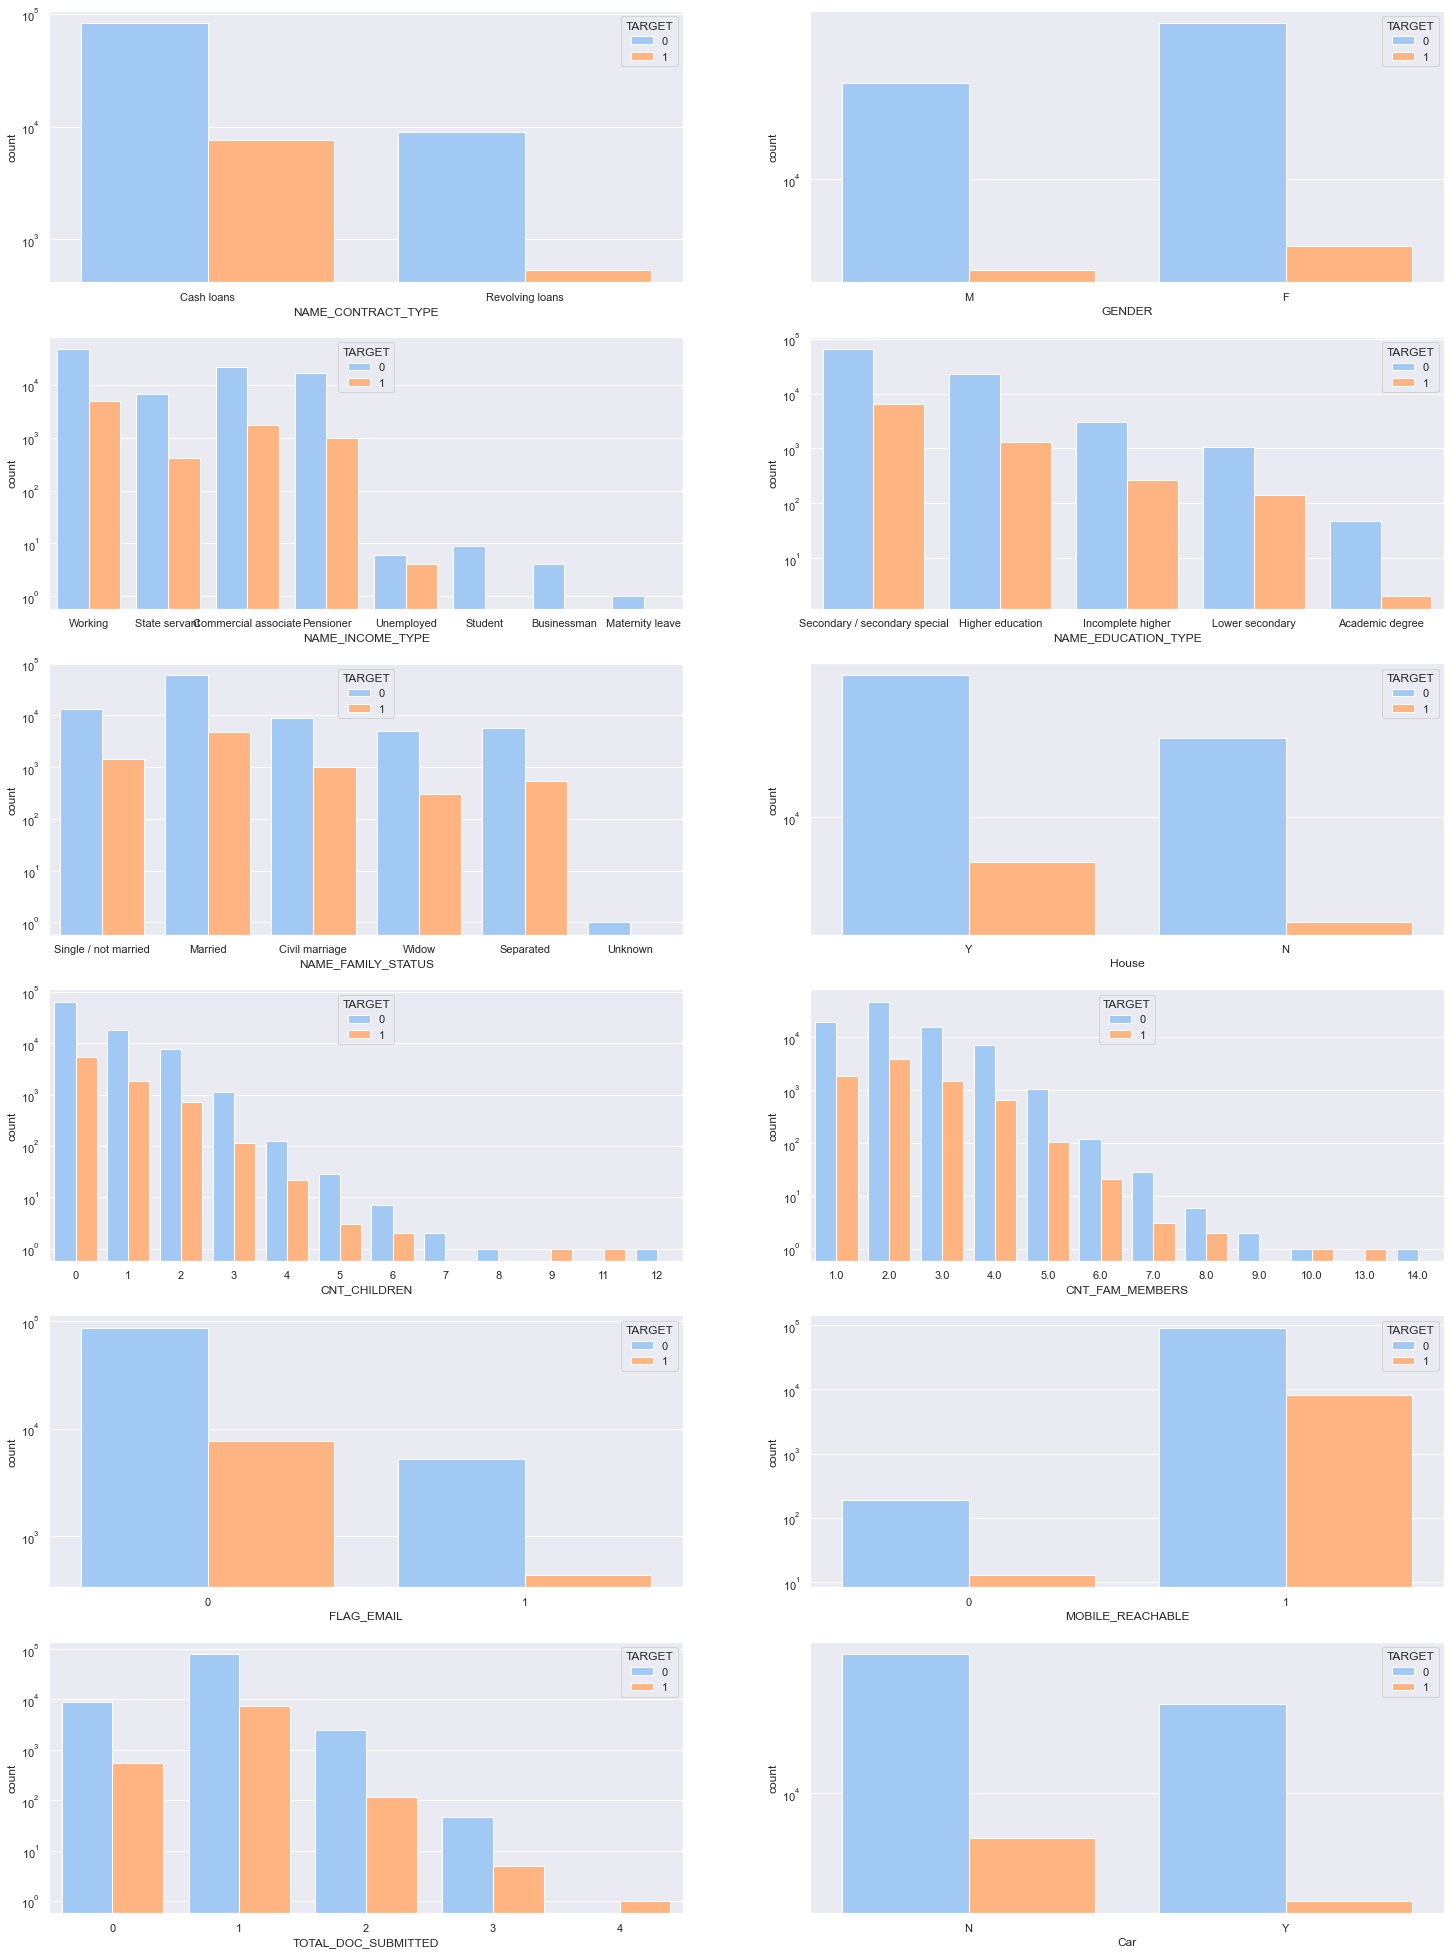

In [48]:
plt.figure(figsize=(25,35))
sns.set(font_scale=1)
for i in enumerate(Category):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(data=df,x=i[1],hue='TARGET', saturation=1,palette='pastel')
    plt.yscale("log")
plt.show()

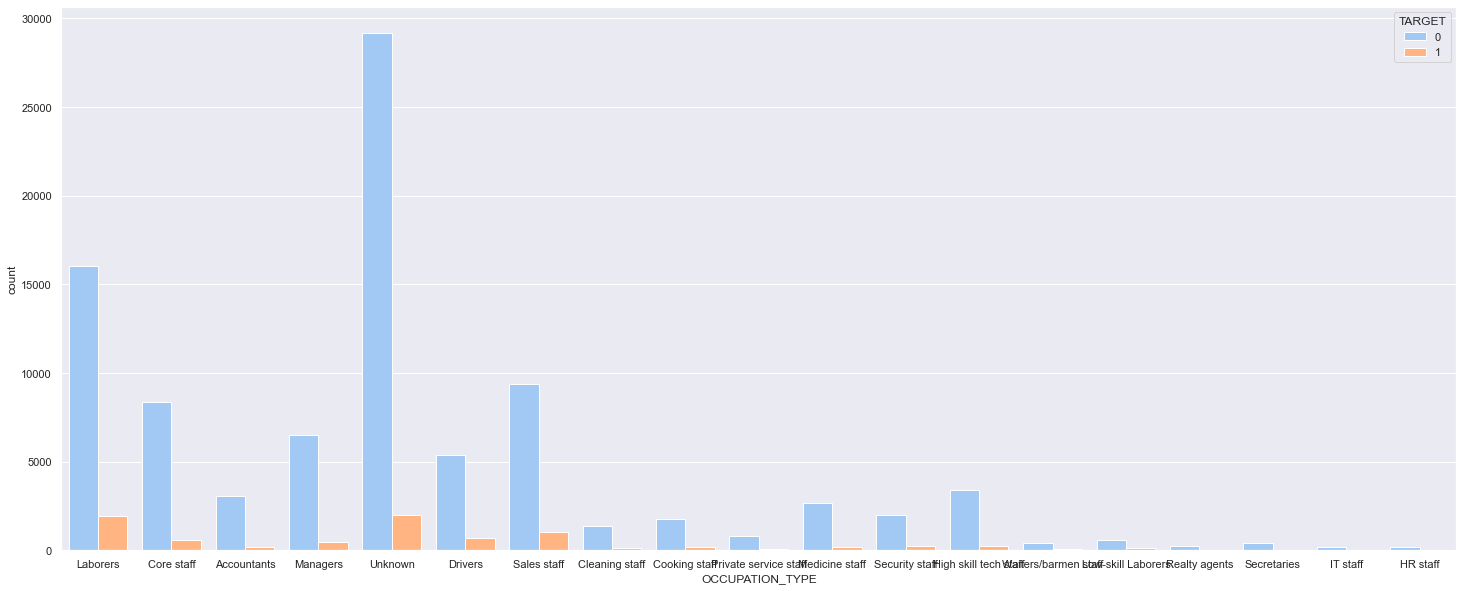

In [53]:
plt.figure(figsize=(25,10))
sns.countplot(data=df,x='OCCUPATION_TYPE',hue='TARGET', saturation=1,palette='pastel');

# Cash Loans had the highest percentage of defaulters
# whereas revolving loans had lesser percentage of defaulters

# working clients had high default rate
# Maternity Leave clients were also higher in default rate
# Students and Businessman were very less likely to Default

# Lower Secondary, Secondary, Incomplete higher education clients had the bigger hand in defaulting
# Academic Degree holders had the least default ratio

# Civil marriage and Unmarried Clients had the low default ratio
# Widows were the least likely to default

# Males had a higher percentage of Defaulting in comparison to Females
# females were very less likely to default compared to males

# Family members with higher number of members were the most likely to Default, ranging from 10-13 members
# with peak values noticed between 11-13 members
# Members with 1-5 were able to repay the loan

# Low skill laborers had the most Default rate
# Followed by Waiters, Drivers
# Least default rate was from Accountants and IT staff, HR staff

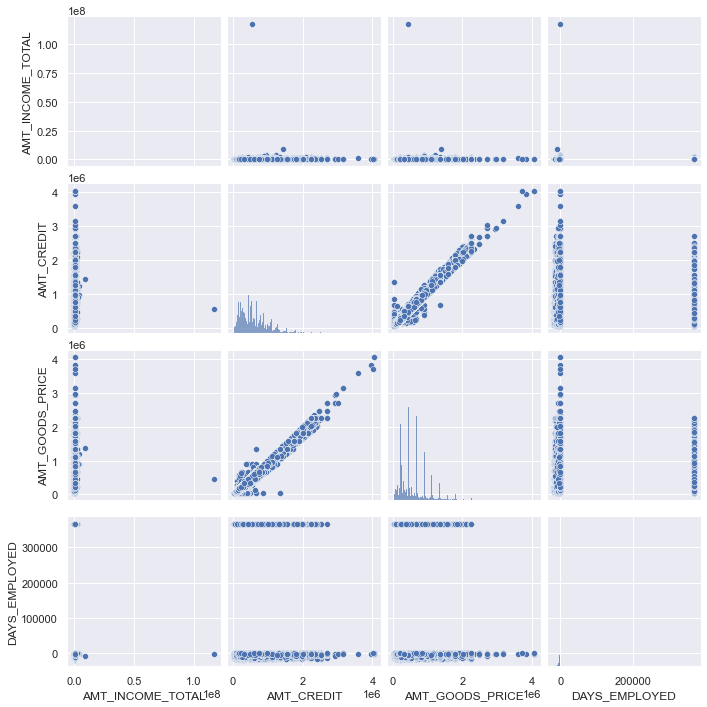

In [50]:
sns.pairplot(data=df,vars=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_GOODS_PRICE","DAYS_EMPLOYED"])
plt.show()

# There is a linear Correlation between:
AMT_GOODS_PRICE and AMT_CREDIT

# After all these analysis i have drawn overall conclusion.


#  Conclusion/Recomendation:

1.Bank should less focus on females because Men are less likely to default on loans than women. This may be due to a number of factors, such as men having higher incomes and being more likely to be employed.

2.Banks should focus less on People with lower incomes as they are more likely to default on loans than people with higher incomes. This is because people with lower incomes have less money to spare in case of an emergency.

3.Banks should focus more on People who work in certain occupations, such as sales, labor, management, and core staff,as they are less likely to default on loans than people who work in other occupations. This may be due to the fact that these occupations tend to pay higher salaries and offer more job security.

4.People who are married and have no children or a single child are less likely to default on loans than people who are single or have multiple children. This may be because married couples have more financial resources and are less likely to experience financial hardship.

5.People with smaller families are less likely to default on loans than people with larger families. This may be because people with smaller families have less financial obligations and are more likely to be able to make their loan payments on time.

These are just some of the factors that can affect the probability of defaulting on a loan. Lenders will typically consider all of these factors, as well as other factors, when making a lending decision